In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [47]:
df = pd.read_csv("Customers.csv")
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [48]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,0,19,15000,39,Healthcare,1,4
1,2,0,21,35000,81,Engineer,3,3
2,3,1,20,86000,6,Engineer,1,1
3,4,1,23,59000,77,Lawyer,0,2
4,5,1,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,1,71,184387,40,Artist,8,7
1996,1997,1,91,73158,32,Doctor,7,7
1997,1998,0,87,90961,14,Healthcare,9,2
1998,1999,0,77,182109,4,Executive,7,2


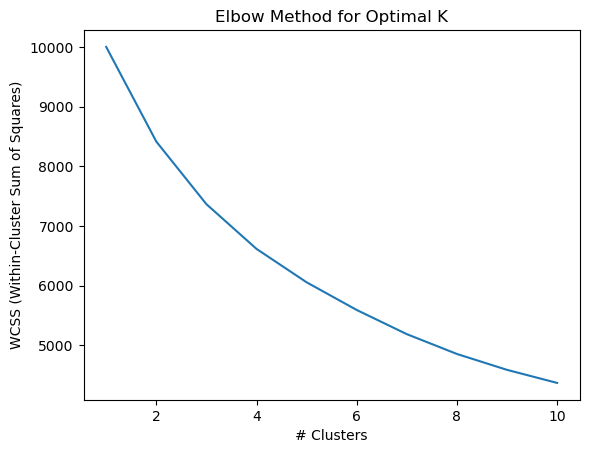

In [49]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']])

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('# Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [50]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_df)

customer_cluster = df.groupby('Cluster').mean(numeric_only=True)
customer_cluster_df = pd.DataFrame(customer_cluster)
print(customer_cluster_df)

          CustomerID    Gender        Age  Annual Income ($)  \
Cluster                                                        
0        1164.234201  0.594796  51.174721      126476.548327   
1        1090.014028  0.563126  49.903808      121304.016032   
2         870.795918  0.600000  42.744898       97816.171429   
3         854.196617  0.615222  51.883721       95049.961945   

         Spending Score (1-100)  Work Experience  Family Size  
Cluster                                                        
0                     49.342007         3.159851     6.156134  
1                     47.244489         9.208417     3.246493  
2                     79.965306         2.206122     2.824490  
3                     26.682875         1.752643     2.581395  
